# AMATH 522: HW5
## Minho Choi
### Problem 1

Here we import all the packages we needed:

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 

import math

We start with initializing the transition matrices for inward and outward channels:

In [2]:
In = np.array([[0.98, 0.1, 0], [0.02, 0.7, 0.05], [0, 0.2, 0.95]])
print('The transition matrix for inward channel is: \n {}'.format(In))
Out = np.array([[0.9, 0.1, 0], [0.1, 0.6, 0.1], [0, 0.3, 0.9]])
print('The transition matrix for inward channel is: \n {}'.format(Out))

The transition matrix for inward channel is: 
 [[0.98 0.1  0.  ]
 [0.02 0.7  0.05]
 [0.   0.2  0.95]]
The transition matrix for inward channel is: 
 [[0.9 0.1 0. ]
 [0.1 0.6 0.1]
 [0.  0.3 0.9]]


First, we compute the equilibrium state probabilities of the transition matrices:

In [3]:
In_eigenvalue, In_eigenvector = np.linalg.eig(In)
In_esp = In_eigenvector[:, -1] / np.sum(In_eigenvector[:, -1])
print("The equilibrium state probability for inward channel is: {}".format(In_esp))
Out_eigenvalue, Out_eigenvector = np.linalg.eig(Out)
Out_esp = Out_eigenvector[:, -1] / np.sum(Out_eigenvector[:, -1])
print("The equilibrium state probability for outward channel is: {}".format(Out_esp))

The equilibrium state probability for inward channel is: [0.5 0.1 0.4]
The equilibrium state probability for outward channel is: [0.2 0.2 0.6]


Hence, the probability of a single inward channel being opened is 0.4, and the probability of a single outward channel being opened is 0.6. Then, we have:

$$\begin{equation*}
\begin{split}
    \text{P}(t = T) &= \text{P}(n_{inward} - n_{outward} = T) = \text{P}(n_{inward} = T + n_{outward}) \\
    &= \sum_{k=\max(0, -T)}^{\min(N_{outward}, N_{inward}-T)} \begin{pmatrix} N_{inward} \\ T + k \end{pmatrix} 0.4^{T+k} 0.6^{N_{inward}-T-k} \cdot \begin{pmatrix} N_{outward} \\ k \end{pmatrix} 0.6^k 0.4^{N_{outward}-k} \\
\end{split}
\end{equation*}$$

Hence, the probability that the cell will produce a spike in a given timestep is:
$$\begin{equation*}
\begin{split}
    \text{P}(t > T) &= 1 - \text{P}(t \leq T) = 1 - \sum_{i=-N_{outward}}^T\sum_{k=\max(0, -i)}^{\min(N_{outward}, N_{inward}-i)} \begin{pmatrix} N_{inward} \\ i + k \end{pmatrix} 0.4^{i+k} 0.6^{N_{inward}-i-k} \cdot \begin{pmatrix} N_{outward} \\ k \end{pmatrix} 0.6^k 0.4^{N_{outward}-k} \\
\end{split}
\end{equation*}$$

Based on the equation above, we create a function that calculates $\text{P}(t > T)$:

In [4]:
def prob_spike(T, N_in, N_out):
    prob = 0
    for i in range(-N_out, T+1):
        start = max(0, -i)
        end = min(N_out, N_in - i)
        for k in range(start, end+1):
            prob = prob + math.comb(N_in, i+k) * (0.4 ** (i+k)) * (0.6 ** (N_in-i-k)) * math.comb(N_out, k) * (0.6 ** k) * (0.4 ** (N_out-k))

    return 1 - prob

We plot the probability of spike occuring when $N_{inward} = 100$ and $N_{inward} = 50$:

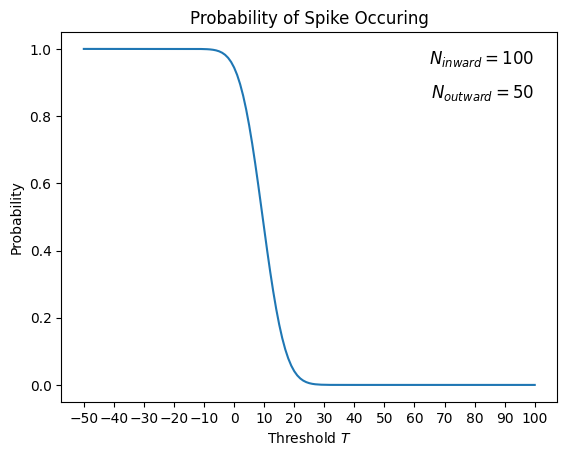

In [5]:
N_in = 100
N_out = 50
thresholds = np.arange(-N_out, N_in + 1)
probs = np.zeros(N_in + N_out + 1)
for T in thresholds:
    probs[T + N_out] = prob_spike(T, N_in, N_out)
probs

plt.plot(thresholds, probs)
plt.xticks(range(-N_out, N_in + 1, 10))
plt.xlabel('Threshold $T$')
plt.ylabel('Probability')
plt.title('Probability of Spike Occuring')
plt.text(N_in, 1, '$N_{inward} = 100$', verticalalignment='top', horizontalalignment='right', fontsize=12)
plt.text(N_in, 0.9, '$N_{outward} = 50$', verticalalignment='top', horizontalalignment='right', fontsize=12)
plt.show()

We try different values for $N_{inward}$ and $N_{outward}$:

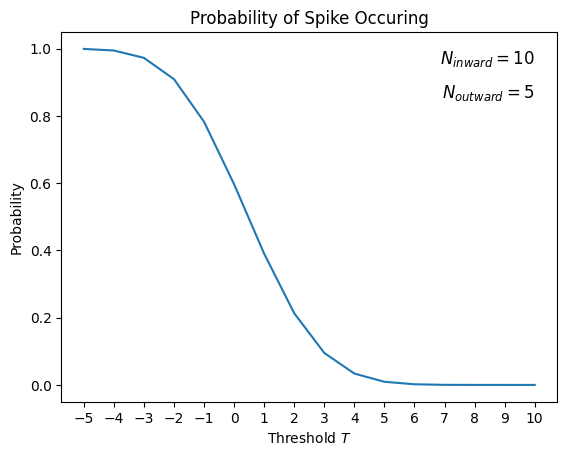

In [6]:
N_in = 10
N_out = 5
thresholds = np.arange(-N_out, N_in + 1)
probs = np.zeros(N_in + N_out + 1)
for T in thresholds:
    probs[T + N_out] = prob_spike(T, N_in, N_out)
probs

plt.plot(thresholds, probs)
plt.xticks(range(-N_out, N_in + 1, 1))
plt.xlabel('Threshold $T$')
plt.ylabel('Probability')
plt.title('Probability of Spike Occuring')
plt.text(N_in, 1, '$N_{inward} = 10$', verticalalignment='top', horizontalalignment='right', fontsize=12)
plt.text(N_in, 0.9, '$N_{outward} = 5$', verticalalignment='top', horizontalalignment='right', fontsize=12)
plt.show()

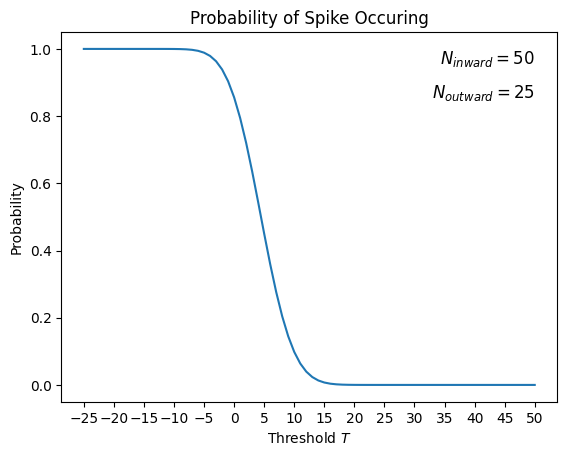

In [7]:
N_in = 50
N_out = 25
thresholds = np.arange(-N_out, N_in + 1)
probs = np.zeros(N_in + N_out + 1)
for T in thresholds:
    probs[T + N_out] = prob_spike(T, N_in, N_out)
probs

plt.plot(thresholds, probs)
plt.xticks(range(-N_out, N_in + 1, 5))
plt.xlabel('Threshold $T$')
plt.ylabel('Probability')
plt.title('Probability of Spike Occuring')
plt.text(N_in, 1, '$N_{inward} = 50$', verticalalignment='top', horizontalalignment='right', fontsize=12)
plt.text(N_in, 0.9, '$N_{outward} = 25$', verticalalignment='top', horizontalalignment='right', fontsize=12)
plt.show()

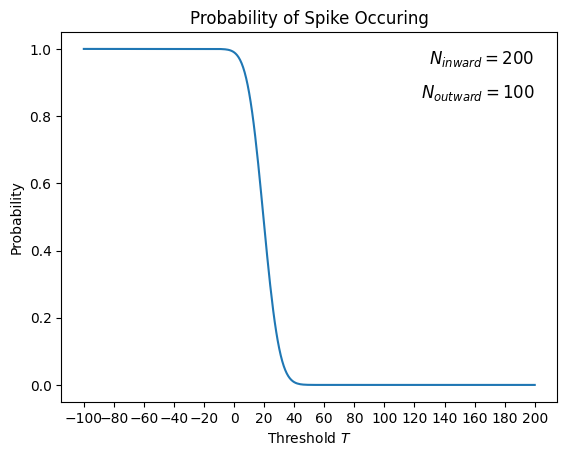

In [8]:
N_in = 200
N_out = 100
thresholds = np.arange(-N_out, N_in + 1)
probs = np.zeros(N_in + N_out + 1)
for T in thresholds:
    probs[T + N_out] = prob_spike(T, N_in, N_out)
probs

plt.plot(thresholds, probs)
plt.xticks(range(-N_out, N_in + 1, 20))
plt.xlabel('Threshold $T$')
plt.ylabel('Probability')
plt.title('Probability of Spike Occuring')
plt.text(N_in, 1, '$N_{inward} = 200$', verticalalignment='top', horizontalalignment='right', fontsize=12)
plt.text(N_in, 0.9, '$N_{outward} = 100$', verticalalignment='top', horizontalalignment='right', fontsize=12)
plt.show()

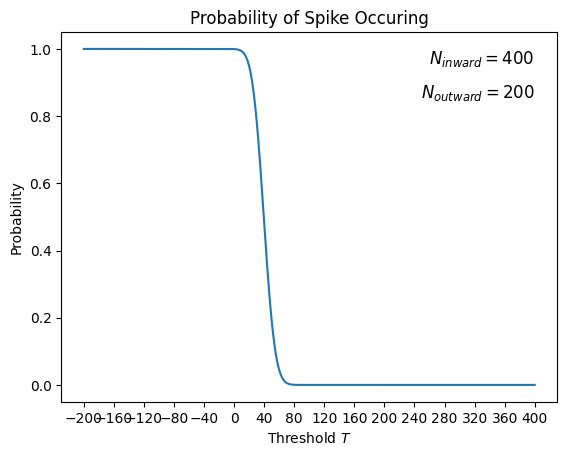

In [9]:
N_in = 400
N_out = 200
thresholds = np.arange(-N_out, N_in + 1)
probs = np.zeros(N_in + N_out + 1)
for T in thresholds:
    probs[T + N_out] = prob_spike(T, N_in, N_out)
probs

plt.plot(thresholds, probs)
plt.xticks(range(-N_out, N_in + 1, 40))
plt.xlabel('Threshold $T$')
plt.ylabel('Probability')
plt.title('Probability of Spike Occuring')
plt.text(N_in, 1, '$N_{inward} = 400$', verticalalignment='top', horizontalalignment='right', fontsize=12)
plt.text(N_in, 0.9, '$N_{outward} = 200$', verticalalignment='top', horizontalalignment='right', fontsize=12)
plt.show()

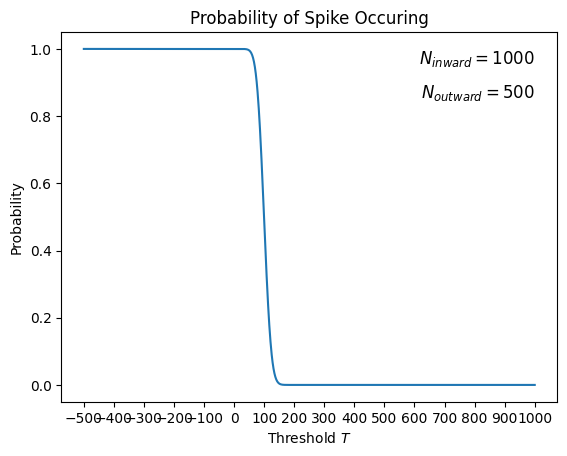

In [10]:
N_in = 1000
N_out = 500
thresholds = np.arange(-N_out, N_in + 1)
probs = np.zeros(N_in + N_out + 1)
for T in thresholds:
    probs[T + N_out] = prob_spike(T, N_in, N_out)
probs

plt.plot(thresholds, probs)
plt.xticks(range(-N_out, N_in + 1, 100))
plt.xlabel('Threshold $T$')
plt.ylabel('Probability')
plt.title('Probability of Spike Occuring')
plt.text(N_in, 1, '$N_{inward} = 1000$', verticalalignment='top', horizontalalignment='right', fontsize=12)
plt.text(N_in, 0.9, '$N_{outward} = 500$', verticalalignment='top', horizontalalignment='right', fontsize=12)
plt.show()

As we can see from the plots, the probability line drops more steeply as we input larger values for $N_{inward}$ and $N_{outward}$. When we look at the curve in plot for $N_{inward} = 10$ and $N_{outward} = 5$, the curve starts from 1 and has a gentle decline to 0 as the threshold value increases. The gentle decline in the curve means that the signal-to-noise ratio (SNR) is low, meaning there are relatively high noises in the signal. In contrast, in plot for $N_{inward} = 1000$ and $N_{outward} = 500$, the curve starts at 1 and descreases sharply at $T = 100$. The sharp decline in the curve means that the SNR is high, meaning there are relatively low noises in the signal. As we have more channels, we have stronger signal. Moreover, the threshold value where the probability is approximately 0.5 increases as we increase the values of $N_{inward}$ and $N_{outward}$.

We can understand the qualitative changes in the plots better by calculating the SNR values. First, we have:
$$\mathbb{E}(t) = \mathbb{E}(n_{inward} - n_{outward}) = \mathbb{E}(n_{inward}) - \mathbb{E}(n_{outward}) = N_{inward} \times 0.4 - N_{outward} \times 0.6$$
Note that since we have currents of 1 for inward channel and -1 for outward channel, the current variable $i$ is ignored. For all the plots, we set:
$$N_{inward} = 2 \times N_{outward}$$
Hence, we further have:
$$\mathbb{E}(t) = N_{outward} \times 0.8 - N_{outward} \times 0.6 = N_{outward} \times 0.2$$
As we increases the values of $N_{inward}$ and $N_{outward}$, we get higher expected values, and that is why the threshold where the probability is approximately 0.5 increased as we increased $N_{inward}$ and $N_{outward}$ values. Next, we look at the variance:
$$\text{Var}(t) = \text{Var}(n_{inward} - n_{outward}) = \text{Var}(n_{inward}) - \text{Var}(n_{outward}) + 2\text{Cov}(n_{inward}, -n_{outward})$$
Since $n_{inward}$ and $n_{outward}$ are independent, we further have:
$$\text{Var}(t) = \text{Var}(n_{inward}) - \text{Var}(n_{outward}) = N_{inward} \times 0.4 \times 0.6 - N_{outward} \times 0.6 \times 0.4 = 0.24(N_{inward} - N_{outward})$$
Let $N_{inward} = 2 \times N_{outward}$, then we get:
$$\text{Var}(t) = 0.24(2N_{outward} - N_{outward}) = 0.24 \times N_{outward}$$
Hence, the SNR value is:
$$\text{SNR} = \frac{0.2 \times N_{outward}}{\sqrt{0.24 \times N_{outward}}} = \sqrt{\frac{N_{outward}}{6}}$$
Thus, the SNR value is proportion to square root of $N_{outward}$, meaning as the value of $N_{outward}$ increases, we get higher SNR values, which represents lower noises in the signal. This is what we saw from the plots.

Our expression for SNR matches with the argument stated by White J. A. et al. (2000) in "Channel noise in neurons", which says 'the noisiness of a membrane current declines in proportion to the square root of the number of channels'. Moreover, as White J. A. et al. mentioned in their article that 'small number of channels are more noisy and more excitable', more number of neurons result in lesser noise and more reliabe signal as we saw from the plots and SNR values.